In [1]:
from GeneralGlobalModel_Class import GlobalModel
import Reactions_H as R
import matplotlib.pyplot as plt
import numpy as np

me=9.11e-31
mp=1.67e-27
q=1.6e-19
c1='violet'
c2='orange'
c3='lightgreen'

In [2]:
reactions=R.reactions1
gm=GlobalModel(reactions,[2*mp,0])

### Style

In [3]:
def style (i):
    color_list=['tab:blue','tab:orange','tab:green','tab:red','tab:purple','black']
    marker_list=['-','--','-.',':']
    k,j=np.divmod(i,len(color_list))
    return color_list[j],marker_list[k]

### Reacciones

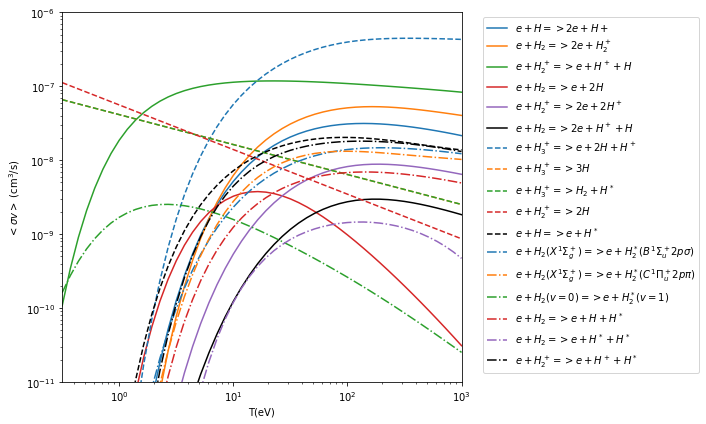

In [4]:
%matplotlib inline
figure=plt.figure(figsize=(10,6))
elog=np.logspace(-0.5,3)
for i in range (len(reactions)):
    color,marker=style(i)
    r=reactions[i]
    if (r[1]!='surface')and(r[1]!='heavy'):
        plt.plot(elog,r[5](elog),color=color,linestyle=marker,label=r[0])
plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-11,1e-6)
plt.xlabel('T(eV)')
plt.ylabel('$<\sigma v>$ (cm$^{3}$/s)')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.tight_layout()
plt.xlim([10**-0.5,1e3])
plt.savefig('Figures\Cs.pdf')

### Densidad crítica

In [ ]:
from scipy.optimize import fsolve
import warnings
warnings.filterwarnings('ignore')

def Find_solutions(pwr,n): #cambia la init. La especie neutra en mayor concentración. O que la init se pueda cambiar desde fuera o que sea un input del objeto
        bol=True
        e0=1
        init=n/100*np.ones(6)
        init[-1]=e0
        sol=fsolve(gm.Eq_system,init,args=(pwr,n),full_output=1)
        converge=sol[2]
        while (converge!=1)and(e0<20000):
            e0=e0*1.2
            init=n/100*np.ones(6)
            init[-1]=e0
            sol=fsolve(gm.Eq_system,init,args=(pwr,n),full_output=1)
            converge=sol[2]
        sol1=sol
        converge=0
        while (converge!=1)and(e0<20000):
            e0=e0*1.2
            init=n/100*np.ones(6)
            init[-1]=e0
            sol=fsolve(gm.Eq_system,init,args=(pwr,n),full_output=1)
            converge=sol[2]
            if np.abs(sol[0][5]-sol1[0][5])<0.1:
                converge=0
        sol2=sol
        if e0>20000:
            bol=False
        return sol1,sol2,bol

    
n0=np.logspace(13,13.5,100)
es1=np.array([])
es2=np.array([])
n1=np.array([])
n2=np.array([])
ns=np.array([])
for ni in n0:
    sol1,sol2,bol=Find_solutions(1e5,ni)
    if bol:
        ns=np.append(ns,ni)
        es1=np.append(es1,sol1[0][5])
        es2=np.append(es2,sol2[0][5])
        n1=np.append(n1,sol1[0][1])
        n2=np.append(n2,sol2[0][1])
es2=np.flip(es2)
ns1=ns
ns2=np.flip(ns)
n2=np.flip(n2)
ns01=np.concatenate((ns2,ns1))
es01=np.concatenate((es2,es1))
nH01=np.concatenate((n2,n1))

es1=np.array([])
es2=np.array([])
n1=np.array([])
n2=np.array([])
ns=np.array([])
for ni in n0:
    sol1,sol2,bol=Find_solutions(5e5,ni)
    if bol:
        ns=np.append(ns,ni)
        es1=np.append(es1,sol1[0][5])
        es2=np.append(es2,sol2[0][5])
        n1=np.append(n1,sol1[0][1])
        n2=np.append(n2,sol2[0][1])
ns1=ns
ns2=np.flip(ns)
ns02=np.concatenate((ns2,ns1))
es2=np.flip(es2)
n2=np.flip(n2)
es02=np.concatenate((es2,es1))
nH02=np.concatenate((n2,n1))
es1=np.array([])
es2=np.array([])
n1=np.array([])
n2=np.array([])
ns=np.array([])
for ni in n0:
    sol1,sol2,bol=Find_solutions(1e6,ni)
    if bol:
        ns=np.append(ns,ni)
        es1=np.append(es1,sol1[0][5])
        es2=np.append(es2,sol2[0][5])
        n1=np.append(n1,sol1[0][1])
        n2=np.append(n2,sol2[0][1])
ns1=ns
ns2=np.flip(ns)
n2=np.flip(n2)
ns03=np.concatenate((ns2,ns1))
es2=np.flip(es2)
es03=np.concatenate((es2,es1))
nH03=np.concatenate((n2,n1))

In [ ]:
ns01+nH01

In [ ]:

%matplotlib widget
plt.figure(figsize=(8,3))
plt.plot(es01,ns01+nH01,label='p=1e5W/m^3',c='black',linestyle='-')
plt.plot(es02,ns02+nH02,label='p=5e6W/m^3',c='black',linestyle='--')
plt.plot(es03,ns03+nH03,label='p=1e6W/m^3',c='black',linestyle='-.')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$T_e$(eV)')
plt.ylabel('$n_{0}$(cm^-3)')
plt.tight_layout()
plt.savefig('Critical_density.pdf')
plt.savefig('Critical_density.png')

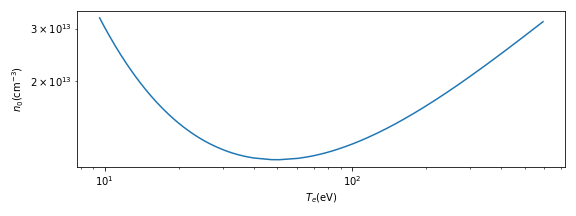

In [196]:
plt.figure(figsize=(8,3))
plt.plot(es01,ns01+nH01,label='p=5e5W/m^3')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$T_e$(eV)')
plt.ylabel('$n_0$(cm$^{-3}$)')
plt.tight_layout()
plt.savefig('Critical_density.pdf')

### Graficas 1D

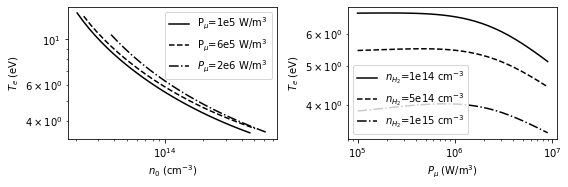

In [7]:
nmin,nmax=2e13,4.5e14
pmin,pmax=1e5,9e6
N=30
p01,p02,p03=1e5,6e5,3e6
n01,n02,n03=6e13,1e14,3e14
'''
_______________________________________________________________________
'''
fig,ax=plt.subplots(1,2,figsize=(8,2.7))
nH2,[ne,nH,n1,n2,n3,e]=gm.Find_solution_n_sweep(p01,nmin,nmax,N,'log')
ng=nH+nH2
ax[0].plot(ng,e,label='P$_\mu$=1e5 W/m$^{3}$',c='black',linestyle='-')
nH2,[ne,nH,n1,n2,n3,e]=gm.Find_solution_n_sweep(p02,nmin,nmax,N,'log')
ng=nH+nH2
ax[0].plot(ng,e,label='P$_\mu$=6e5 W/m$^{3}$',c='black',linestyle='--')
nH2,[ne,nH,n1,n2,n3,e]=gm.Find_solution_n_sweep(p03,nmin,nmax,N,'log')
ng=nH+nH2
ax[0].plot(ng,e,label='$P_\mu$=2e6 W/m$^{3}$',c='black',linestyle='-.')
p,[ne,nH,n1,n2,n3,e]=gm.Find_solution_p_sweep(n01,pmin,pmax,N,'log')
ax[1].plot(p,e,label='$n_{H_2}$=1e14 cm$^{-3}$',c='black',linestyle='-')
p,[ne,nH,n1,n2,n3,e]=gm.Find_solution_p_sweep(n02,pmin,pmax,N,'log')
ax[1].plot(p,e,label='$n_{H_2}$=5e14 cm$^{-3}$',c='black',linestyle='--')
p,[ne,nH,n1,n2,n3,e]=gm.Find_solution_p_sweep(n03,pmin,pmax,N,'log')
ax[1].plot(p,e,label='$n_{H_2}$=1e15 cm$^{-3}$',c='black',linestyle='-.')

ax[0].set_ylabel('$T_e$ (eV)')
ax[0].set_xlabel('$n_0$ (cm$^{-3}$)')
ax[1].set_ylabel('$T_e$ (eV)')
ax[1].set_xlabel('$P_\mu$ (W/m$^{3}$)')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].legend()
ax[1].legend()
plt.tight_layout()
plt.savefig('Figures\Te_lines.pdf')
plt.savefig('Presentacion\Te_lines.png')

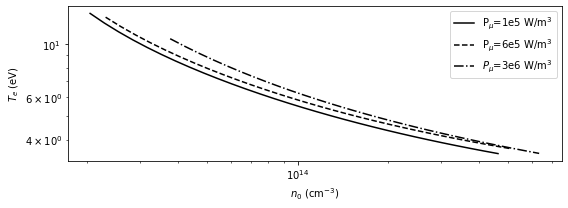

In [14]:
nmin,nmax=2e13,4.5e14
pmin,pmax=1e5,9e6
N=30
p01,p02,p03=1e5,6e5,3e6
n01,n02,n03=6e13,1e14,3e14
'''
_______________________________________________________________________
'''
fig,ax=plt.subplots(1,1,figsize=(8,3))
nH2,[ne,nH,n1,n2,n3,e]=gm.Find_solution_n_sweep(p01,nmin,nmax,N,'log')
ng=nH+nH2
ax.plot(ng,e,label='P$_\mu$=1e5 W/m$^{3}$',c='black',linestyle='-')
nH2,[ne,nH,n1,n2,n3,e]=gm.Find_solution_n_sweep(p02,nmin,nmax,N,'log')
ng=nH+nH2
ax.plot(ng,e,label='P$_\mu$=6e5 W/m$^{3}$',c='black',linestyle='--')
nH2,[ne,nH,n1,n2,n3,e]=gm.Find_solution_n_sweep(p03,nmin,nmax,N,'log')
ng=nH+nH2
ax.plot(ng,e,label='$P_\mu$=3e6 W/m$^{3}$',c='black',linestyle='-.')
ax.set_ylabel('$T_e$ (eV)')
ax.set_xlabel('$n_0$ (cm$^{-3}$)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
plt.tight_layout()
plt.savefig('Presentacion\Te_lines.png')

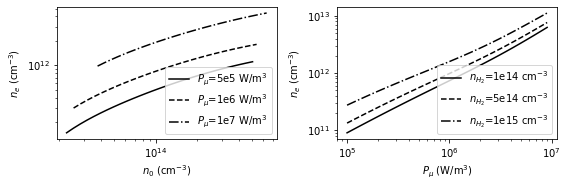

In [9]:
nmin,nmax=2e13,4.5e14
pmin,pmax=1e5,9e6
N=30
p01,p02,p03=5e5,1e6,3e6
n01,n02,n03=6e13,1e14,3e14
'''
__________________________________________________________________
'''
fig,ax=plt.subplots(1,2,figsize=(8,2.7))
nH2,[ne,nH,n1,n2,n3,e]=gm.Find_solution_n_sweep(p01,nmin,nmax,N,'log')
ng=nH+nH2
ax[0].plot(ng,ne,label='$P_\mu$=5e5 W/m$^{3}$',c='black',linestyle='-')
nH2,[ne,nH,n1,n2,n3,e]=gm.Find_solution_n_sweep(p02,nmin,nmax,N,'log')
ng=nH+nH2
ax[0].plot(ng,ne,label='$P_\mu$=1e6 W/m$^{3}$',c='black',linestyle='--')
nH2,[ne,nH,n1,n2,n3,e]=gm.Find_solution_n_sweep(p03,nmin,nmax,N,'log')
ng=nH+nH2
ax[0].plot(ng,ne,label='$P_\mu$=1e7 W/m$^{3}$',c='black',linestyle='-.')
p,[ne,nH,n1,n2,n3,e]=gm.Find_solution_p_sweep(n01,pmin,pmax,N,'log')
ax[1].plot(p,ne,label='$n_{H_2}$=1e14 cm$^{-3}$',c='black',linestyle='-')
p,[ne,nH,n1,n2,n3,e]=gm.Find_solution_p_sweep(n02,pmin,pmax,N,'log')
ax[1].plot(p,ne,label='$n_{H_2}$=5e14 cm$^{-3}$',c='black',linestyle='--')
p,[ne,nH,n1,n2,n3,e]=gm.Find_solution_p_sweep(n03,pmin,pmax,N,'log')
ax[1].plot(p,ne,label='$n_{H_2}$=1e15 cm$^{-3}$',c='black',linestyle='-.')

ax[0].set_ylabel('$n_e$ (cm$^{-3}$)')
ax[0].set_xlabel('$n_0$ (cm$^{-3}$)')
ax[1].set_ylabel('$n_e$ (cm$^{-3}$)')
ax[1].set_xlabel('$P_\mu$ (W/m$^{3}$)')


ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].legend()
ax[1].legend()
plt.tight_layout()
plt.savefig('Figures/Ne_lines.pdf')
plt.savefig('Presentacion/Ne_lines.png')

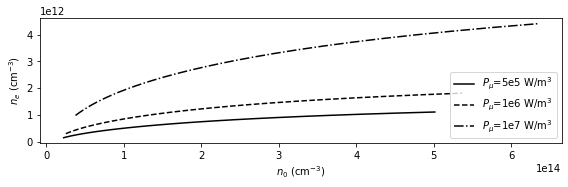

In [17]:
nmin,nmax=2e13,4.5e14
pmin,pmax=1e5,9e6
N=30
p01,p02,p03=5e5,1e6,3e6
n01,n02,n03=6e13,1e14,3e14
'''
__________________________________________________________________
'''
fig,ax=plt.subplots(1,1,figsize=(8,2.7))
nH2,[ne,nH,n1,n2,n3,e]=gm.Find_solution_n_sweep(p01,nmin,nmax,N,'log')
ng=nH+nH2
ax.plot(ng,ne,label='$P_\mu$=5e5 W/m$^{3}$',c='black',linestyle='-')
nH2,[ne,nH,n1,n2,n3,e]=gm.Find_solution_n_sweep(p02,nmin,nmax,N,'log')
ng=nH+nH2
ax.plot(ng,ne,label='$P_\mu$=1e6 W/m$^{3}$',c='black',linestyle='--')
nH2,[ne,nH,n1,n2,n3,e]=gm.Find_solution_n_sweep(p03,nmin,nmax,N,'log')
ng=nH+nH2
ax.plot(ng,ne,label='$P_\mu$=1e7 W/m$^{3}$',c='black',linestyle='-.')
ax.set_ylabel('$n_e$ (cm$^{-3}$)')
ax.set_xlabel('$n_0$ (cm$^{-3}$)')
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.legend()
plt.tight_layout()
plt.savefig('Presentacion/Ne_lines.png')

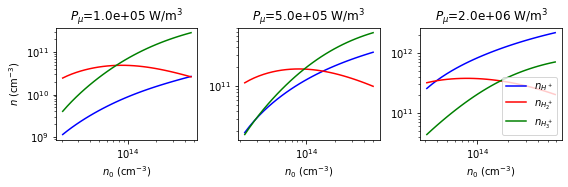

In [16]:
p1=1e5
p2=5e5
p3=2e6
nmin,nmax=2e13,4.5e14
N=30
'''
_________________________________________________________________
'''
fig,ax=plt.subplots(1,3,figsize=(8,2.7))
nH2,[ne,nH,n1,n2,n3,e]=gm.Find_solution_n_sweep(p1,nmin,nmax,N,'log')
ng=nH+nH2
ax[0].plot(ng,n1,color='blue',label='$n_{H^+}$')
ax[0].plot(ng,n2,color='red',label='$n_{H_2^+}$')
ax[0].plot(ng,n3,color='green',label='$n_{H_3^+}$')
nH2,[ne,nH,n1,n2,n3,e]=gm.Find_solution_n_sweep(p2,nmin,nmax,N,'log')
ng=nH+nH2
ax[1].plot(ng,n1,color='blue',label='$n_{H^+}$')
ax[1].plot(ng,n2,color='red',label='$n_{H_2^+}$')
ax[1].plot(ng,n3,color='green',label='$n_{H_3^+}$')
nH2,[ne,nH,n1,n2,n3,e]=gm.Find_solution_n_sweep(p3,nmin,nmax,N,'log')
ng=nH+nH2
ax[2].plot(ng,n1,color='blue',label='$n_{H^+}$')
ax[2].plot(ng,n2,color='red',label='$n_{H_2^+}$')
ax[2].plot(ng,n3,color='green',label='$n_{H_3^+}$')

ax[0].set_ylabel('$n$ (cm$^{-3}$)')
ax[0].set_xlabel('$n_0$ (cm$^{-3}$)')
ax[1].set_xlabel('$n_0$ (cm$^{-3}$)')
ax[2].set_xlabel('$n_0$ (cm$^{-3}$)')
ax[2].legend()
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[2].set_yscale('log')

ax[0].title.set_text('$P_\mu$={:.1e} W/m$^3$'.format(p1))
ax[1].title.set_text('$P_\mu$={:.1e} W/m$^3$'.format(p2))
ax[2].title.set_text('$P_\mu$={:.1e} W/m$^3$'.format(p3))
plt.tight_layout()
plt.savefig('Figures\species_lines_n.pdf')
plt.savefig('Presentacion\species_lines_n.png')

In [ ]:
n01=4e13
n02=1e14
n03=3e14
pmin,pmax=1e5,6e6
N=30
'''
_________________________________________________________________
'''
fig,ax=plt.subplots(1,3,figsize=(8,2.7))
ps,[ne,nH,n1,n2,n3,e]=gm.Find_solution_p_sweep(n01,pmin,pmax,N,'log')

ax[0].plot(ps,n1,color='blue',label='$n_{H^+}$')
ax[0].plot(ps,n2,color='red',label='$n_{H_2^+}$')
ax[0].plot(ps,n3,color='green',label='$n_{H_3^+}$')
ps,[ne,nH,n1,n2,n3,e]=gm.Find_solution_p_sweep(n02,pmin,pmax,N,'log')

ax[1].plot(ps,n1,color='blue',label='$n_{H^+}$')
ax[1].plot(ps,n2,color='red',label='$n_{H_2^+}$')
ax[1].plot(ps,n3,color='green',label='$n_{H_3^+}$')
ps,[ne,nH,n1,n2,n3,e]=gm.Find_solution_p_sweep(n03,pmin,pmax,N,'log')

ax[2].plot(ps,n1,color='blue',label='$n_{H^+}$')
ax[2].plot(ps,n2,color='red',label='$n_{H_2^+}$')
ax[2].plot(ps,n3,color='green',label='$n_{H_3^+}$')

ax[0].set_ylabel('$n$ (cm$^{-3}$)')
ax[0].set_xlabel('$n_0$ (cm$^{-3}$)')
ax[1].set_xlabel('$n_0$ (cm$^{-3}$)')
ax[2].set_xlabel('$n_0$ (cm$^{-3}$)')
ax[2].legend()
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[2].set_yscale('log')

ax[0].title.set_text('$P_\mu$={:.1e} W/m$^3$'.format(n01))
ax[1].title.set_text('$P_\mu$={:.1e} W/m$^3$'.format(n02))
ax[2].title.set_text('$P_\mu$={:.1e} W/m$^3$'.format(n03))

plt.tight_layout()
plt.savefig('Figures\species_lines_p.pdf')
plt.savefig('Presentacion\species_lines_p.png')

In [169]:
gm.Find_solution(8e6,4.5e14)

(array([1.13266581e+13, 3.39277272e+14, 1.08979723e+13, 2.02350968e+11,
        2.26334817e+11, 3.17084447e+00]),
 {'nfev': 67,
  'fjac': array([[-9.63232313e-01, -3.69063405e-02, -2.66044483e-01,
           6.46262750e-03,  3.17927038e-06,  1.80532574e-12],
         [ 2.60462735e-01, -3.70885101e-01, -8.91363545e-01,
           8.62763511e-03,  9.84674292e-06,  8.05540532e-12],
         [-6.57244642e-02, -9.27824962e-01,  3.66970977e-01,
           1.23869185e-02,  1.43514895e-05, -7.07682166e-12],
         [ 4.79260398e-03,  1.49332790e-02,  4.86472218e-03,
           9.99865172e-01,  9.86575131e-06, -2.98315295e-11],
         [-1.39362770e-06, -1.69376876e-05, -4.30828077e-06,
           1.01476924e-05, -1.00000000e+00,  2.12193514e-06],
         [-2.27585317e-12, -3.28743632e-11, -1.95445942e-11,
          -8.30125605e-12, -2.12193514e-06, -1.00000000e+00]]),
  'r': array([-3.14537570e+05,  1.55325054e+04, -5.78569099e+04, -7.65085085e+05,
         -1.14713514e+06, -4.42041058e+18,

### Solución 2D

In [6]:
'''No he definido esta función dentro de la clase GlobalModel, por que necesita
mucho tiempo en calcular la solución 2D. Por eso, calculo el resultado
con gm.Find_solution_2D_sweep y con la función Zonas() represento los mayoritarios utilizando la
solución anterior'''
def zonas(n1array,n2array,n3array):
    N_mayoritario=np.empty((n1array.shape[0],n1array.shape[1]))
    N_mayoritario[:]=np.nan
    limites=np.empty((n1array.shape[0],n1array.shape[1]))
    limites[:]=np.nan
    for i in range (n1array.shape[0]):
        for j in range (n1array.shape[1]):
            if (n1array[i,j]>n2array[i,j])&(n1array[i,j]>n3array[i,j]):
                N_mayoritario[i,j]=1
            if (n2array[i,j]>n1array[i,j])&(n2array[i,j]>n3array[i,j]):
                N_mayoritario[i,j]=2
            if (n3array[i,j]>n2array[i,j])&(n3array[i,j]>n1array[i,j]):
                N_mayoritario[i,j]=3
    for i in range(N_mayoritario.shape[0]-1):
        for j in range(N_mayoritario.shape[1]-1):
            if (N_mayoritario[i,j]!=N_mayoritario[i+1,j])|(N_mayoritario[i,j]!=N_mayoritario[i,j+1]):
                limites[i,j]=1
    return [N_mayoritario,limites]

In [200]:
import matplotlib.ticker as mticker
def log_tick_formatter(val, pos=None):
    return f"$10^{{{int(val)}}}$"


In [201]:
gm.f=0.5
pmin,pmax=1e5,6e6
nmin,nmax=3.5e13,4.5e14
Nn,Np=10,10
nn,pp,[ne,nH,n1,n2,n3,e]=gm.Find_solution_2D_sweep(pmin,pmax,nmin,nmax,Np,Nn,scale='log')
nn=nn+nH

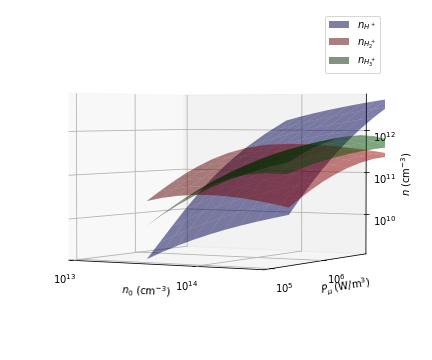

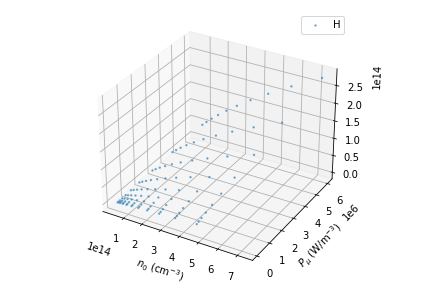

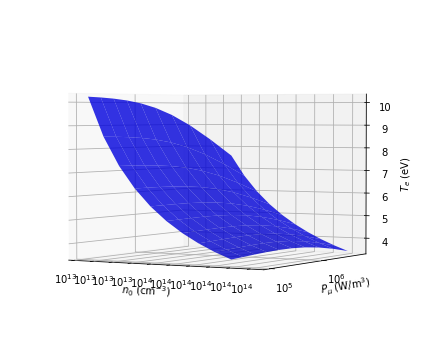

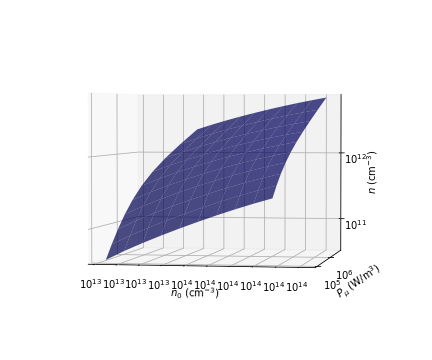

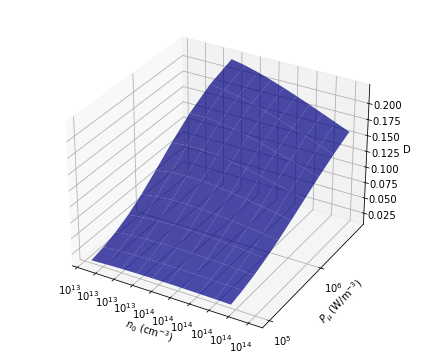

In [202]:
%matplotlib widget
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
mpl.rcParams['legend.fontsize'] = 10

#Species
fig = plt.figure(figsize=(6,5))
ax = fig.gca(projection='3d')
surf1=ax.plot_surface(np.log10(nn),np.log10(pp),np.log10(n1),alpha=0.5,color='blue',label='$n_{H^+}$')
surf2=ax.plot_surface(np.log10(nn),np.log10(pp),np.log10(n2),alpha=0.5,color='red',label='$n_{H_2^+}$')
surf3=ax.plot_surface(np.log10(nn),np.log10(pp),np.log10(n3),alpha=0.5,color='green',label='$n_{H_3^+}$')
surf1._facecolors2d = surf1._facecolor3d
surf2._facecolors2d = surf2._facecolor3d
surf3._facecolors2d = surf3._facecolor3d
surf1._edgecolors2d = surf1._edgecolor3d
surf2._edgecolors2d = surf2._edgecolor3d
surf3._edgecolors2d = surf3._edgecolor3d
plt.xlabel('$n_0$ (cm$^{-3}$)')
plt.ylabel('$P_\mu$ (W/m$^{3}$)')
ax.set_zlabel('$n$ (cm$^{-3}$)')
ax.zaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.zaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax.yaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax.view_init(elev=2, azim=-60)
plt.legend()
plt.tight_layout()
plt.xlim([13,14.5])
plt.savefig('Figures/3D_species.pdf')

#Species
fig = plt.figure()
ax = fig.gca(projection='3d')
#ax.scatter(nn,pp,nH2,alpha=0.5,label='H2')
ax.scatter(nn,pp,nH,s=2,alpha=0.5,label='H')
plt.xlabel('$n_0$ (cm$^{-3}$)')
plt.ylabel('$P_\mu$ (W/m$^{-3}$)')
ax.legend()
plt.tight_layout()

#Te
fig = plt.figure(figsize=(6,5))
ax = fig.gca(projection='3d')
surf1=ax.plot_surface(np.log10(nn),np.log10(pp),e,alpha=0.8,color='blue',label='H+')
surf1._facecolors2d = surf1._facecolor3d
surf1._edgecolors2d = surf1._edgecolor3d
plt.xlabel('$n_0$ (cm$^{-3}$)')
plt.ylabel('$P_\mu$ (W/m$^{3}$)')
ax.set_zlabel('$T_e$ (eV)')

ax.xaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax.yaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax.view_init(elev=2, azim=-60)
plt.tight_layout()
#ax.set_zlim([0,1])
plt.savefig('Figures/3D_Te.pdf')

#ne
fig = plt.figure(figsize=(6,5))
ax = fig.gca(projection='3d')
surf1=ax.plot_surface(np.log10(nn),np.log10(pp),np.log10(ne),alpha=0.7,color='blue',label='H+')
surf1._facecolors2d = surf1._facecolor3d
surf1._edgecolors2d = surf1._edgecolor3d
plt.xlabel('$n_0$ (cm$^{-3}$)')
ax.set_zlabel('$n$ (cm$^{-3}$)')
plt.ylabel('$P_\mu$ (W/m$^{3}$)')
ax.zaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.zaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax.yaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax.view_init(elev=2, azim=-80)
plt.tight_layout()
plt.savefig('Figures/3D_ne.pdf')

#Dissociation degree
mpl.rcParams['legend.fontsize'] = 10
fig = plt.figure(figsize=(6,5))
ax = fig.gca(projection='3d')
ax.plot_surface(np.log10(nn),np.log10(pp),nH/(nH+2*nn),alpha=0.7,color='blue',label='Dissociation_degree')
plt.xlabel('$n_0$ (cm$^{-3}$)')
plt.ylabel('$P_\mu$ (W/m$^{-3}$)')
ax.set_zlabel('D')

ax.xaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax.yaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))
#ax.legend()
plt.tight_layout()
plt.savefig('Figures/3D_dissociation.pdf')


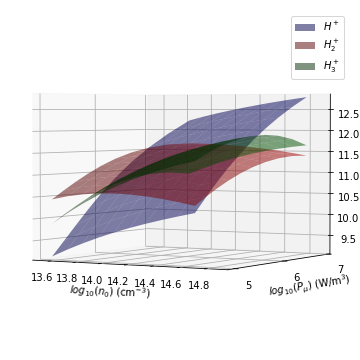

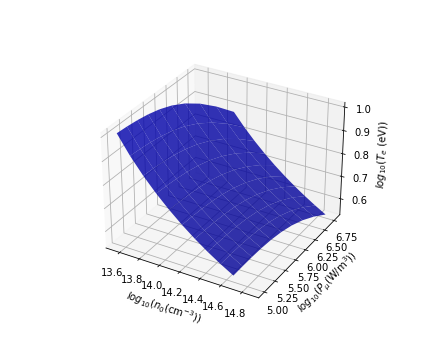

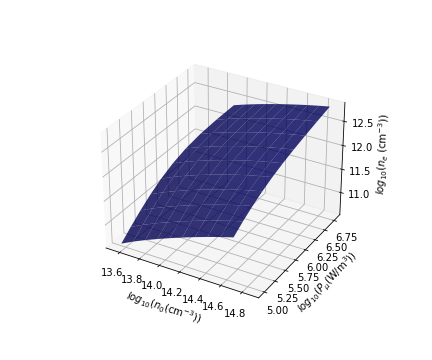

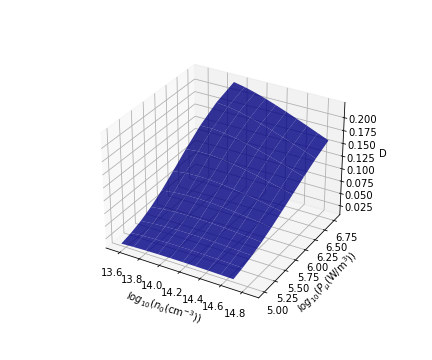

In [243]:
%matplotlib widget
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
mpl.rcParams['legend.fontsize'] = 10

#Species
fig = plt.figure(figsize=(5,5))
ax = fig.gca(projection='3d')
surf1=ax.plot_surface(np.log10(nn),np.log10(pp),np.log10(n1),alpha=0.5,color='blue',label='$H^+$')
surf2=ax.plot_surface(np.log10(nn),np.log10(pp),np.log10(n2),alpha=0.5,color='red',label='$H_2^+$')
surf3=ax.plot_surface(np.log10(nn),np.log10(pp),np.log10(n3),alpha=0.5,color='green',label='$H_3^+$')
surf1._facecolors2d = surf1._facecolor3d
surf2._facecolors2d = surf2._facecolor3d
surf3._facecolors2d = surf3._facecolor3d
surf1._edgecolors2d = surf1._edgecolor3d
surf2._edgecolors2d = surf2._edgecolor3d
surf3._edgecolors2d = surf3._edgecolor3d
plt.yticks([5,6,7])
plt.xlabel('$log_{10}(n_0)$ (cm$^{-3}$)')
plt.ylabel('$log_{10}(P_\mu)$ (W/m$^{3}$)')
ax.set_zlabel('$log_{10}(n)$ (cm$^{-3}$)')
ax.view_init(elev=2, azim=-60)
plt.legend()
plt.tight_layout()
#plt.xlim([13,14.5])
plt.savefig('Figures/3D_species.pdf')


#Te
fig = plt.figure(figsize=(6,5))
ax = fig.gca(projection='3d')
surf1=ax.plot_surface(np.log10(nn),np.log10(pp),np.log10(e),alpha=0.8,color='blue',label='H+')
surf1._facecolors2d = surf1._facecolor3d
surf1._edgecolors2d = surf1._edgecolor3d
plt.xlabel('$log_{10}(n_0 ($cm$^{-3}))$ ')
plt.ylabel('$log_{10}(P_\mu$(W/m$^{3}))$ ')
ax.set_zlabel('$log_{10}(T_e$ (eV))')
plt.savefig('Figures/3D_Te.pdf')
#Ne
fig = plt.figure(figsize=(6,5))
ax = fig.gca(projection='3d')
surf1=ax.plot_surface(np.log10(nn),np.log10(pp),np.log10(ne),alpha=0.8,color='blue',label='H+')
surf1._facecolors2d = surf1._facecolor3d
surf1._edgecolors2d = surf1._edgecolor3d
plt.xlabel('$log_{10}(n_0 ($cm$^{-3}))$ ')
plt.ylabel('$log_{10}(P_\mu$(W/m$^{3}))$ ')
ax.set_zlabel('$log_{10}(n_e$ (cm$^{-3}$))')
plt.savefig('Figures/3D_ne.pdf')
#D
fig = plt.figure(figsize=(6,5))
ax = fig.gca(projection='3d')
surf1=ax.plot_surface(np.log10(nn),np.log10(pp),nH/(nH+2*nn),alpha=0.8,color='blue',label='H+')
surf1._facecolors2d = surf1._facecolor3d
surf1._edgecolors2d = surf1._edgecolor3d
plt.xlabel('$log_{10}(n_0 ($cm$^{-3}))$ ')
plt.ylabel('$log_{10}(P_\mu$(W/m$^{3}))$ ')
ax.set_zlabel('D')
plt.savefig('Figures/3D_dissociation.pdf')

In [174]:
np.min(nH/(nH+2*nn))

0.01125343684961644

In [4]:
pmin,pmax=1e5,6e6
nmin,nmax=4e13,4.5e14
Nn,Np=100,100
nn,pp,[ne,nH,n1,n2,n3,e]=gm.Find_solution_2D_sweep(pmin,pmax,nmin,nmax,Np,Nn,scale='log')

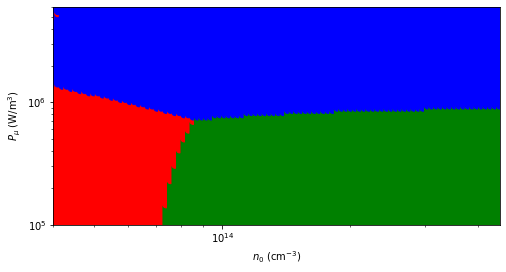

In [8]:
import matplotlib.colors as colors
colorsList = ['blue','red','green']
CustomCmap = colors.ListedColormap(colorsList)
bounds = np.array([0.5,1.5,2.5,3.5])
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=4)

N_mayoritario,limites=zonas(n1,n2,n3)

plt.figure(figsize=(8,4))
plt.scatter(nn.flatten(),pp.flatten(),c=N_mayoritario.flatten().T,cmap=CustomCmap,norm=norm)
plt.xlim([nmin,nmax])
plt.ylim([pmin,pmax])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$n_0$ (cm$^{-3}$)')
plt.ylabel('$P_\mu$ (W/m$^{3}$)')
plt.savefig('Figures/Predominant_map.pdf')

### Contribución de cada reacción 

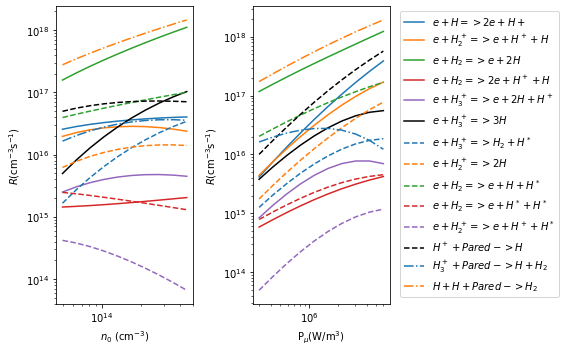

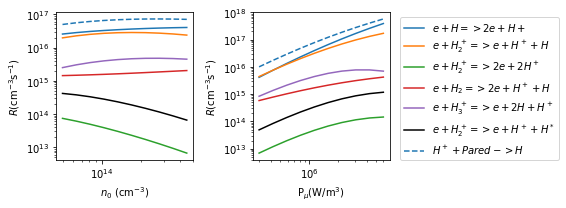

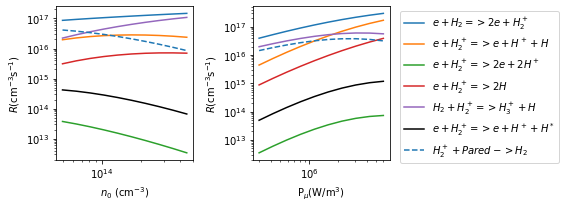

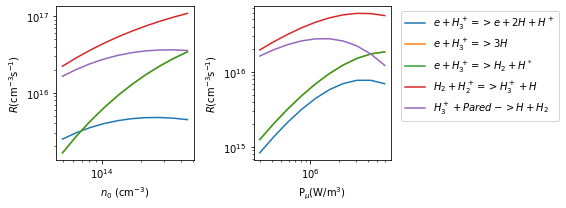

In [6]:
n0=1e14
pmin,pmax=3e5,6e6
p0=1e6
nmin,nmax=5e13,4.5e14
N=10
'''
_________________________________________________________________________________
'''

figsize1=(8,5)
figsize=(8,3)


%matplotlib inline
fig,ax=plt.subplots(1,2,figsize=figsize1)
ps,names0,values0=gm.Contributions_p_sweep([mp,0],n0,pmin,pmax,N,'log')
for i in range (values0[0,:].size):
    color,marker=style(i)
    ax[1].plot(ps,abs(values0[:,i]),color=color,linestyle=marker,label=names0[i])
ns,names0,values0=gm.Contributions_n_sweep([mp,0],p0,nmin,nmax,N,'log')
for i in range (values0[0,:].size):
    color,marker=style(i)
    ax[0].plot(ns,abs(values0[:,i]),color=color,linestyle=marker,label=names0[i])
ax[1].set_xlabel('P$_\mu$(W/m$^3$)')
ax[1].set_ylabel('$R$(cm$^{-3}$s$^{-1}$)')
ax[0].set_xlabel('$n_0$ (cm$^{-3}$)')
ax[0].set_ylabel('$R$(cm$^{-3}$s$^{-1}$)')
ax[1].set_yscale('log')
ax[0].set_yscale('log')
ax[1].set_xscale('log')
ax[0].set_xscale('log')
ax[1].legend(bbox_to_anchor=(1.04,1), loc="upper left")
#fig.suptitle('Reactions involving H', fontsize=16)
plt.tight_layout()
plt.savefig('Figures/Contributions_h.pdf')

fig,ax=plt.subplots(1,2,figsize=figsize)
ps,names0,values0=gm.Contributions_p_sweep([mp,1],n0,pmin,pmax,N,'log')
for i in range (values0[0,:].size):
    color,marker=style(i)
    ax[1].plot(ps,abs(values0[:,i]),color=color,linestyle=marker,label=names0[i])
ns,names0,values0=gm.Contributions_n_sweep([mp,1],p0,nmin,nmax,N,'log')
for i in range (values0[0,:].size):
    color,marker=style(i)
    ax[0].plot(ns,abs(values0[:,i]),color=color,linestyle=marker,label=names0[i])
ax[1].set_xlabel('P$_\mu$(W/m$^3$)')
ax[1].set_ylabel('$R$(cm$^{-3}$s$^{-1}$)')
ax[0].set_xlabel('$n_0$ (cm$^{-3}$)')
ax[0].set_ylabel('$R$(cm$^{-3}$s$^{-1}$)')
ax[1].set_yscale('log')
ax[0].set_yscale('log')
ax[1].set_xscale('log')
ax[0].set_xscale('log')
ax[1].legend(bbox_to_anchor=(1.04,1), loc="upper left")
#fig.suptitle('Reactions involving H+', fontsize=16)
plt.tight_layout()
plt.savefig('Figures/Contributions_h+.pdf')


fig,ax=plt.subplots(1,2,figsize=figsize)
ps,names0,values0=gm.Contributions_p_sweep([2*mp,1],n0,pmin,pmax,N,'log')
for i in range (values0[0,:].size):
    color,marker=style(i)
    ax[1].plot(ps,abs(values0[:,i]),color=color,linestyle=marker,label=names0[i])
ns,names0,values0=gm.Contributions_n_sweep([2*mp,1],p0,nmin,nmax,N,'log')
for i in range (values0[0,:].size):
    color,marker=style(i)
    ax[0].plot(ns,abs(values0[:,i]),color=color,linestyle=marker,label=names0[i])
ax[1].set_xlabel('P$_\mu$(W/m$^3$)')
ax[1].set_ylabel('$R$(cm$^{-3}$s$^{-1}$)')
ax[0].set_xlabel('$n_0$ (cm$^{-3}$)')
ax[0].set_ylabel('$R$(cm$^{-3}$s$^{-1}$)')
ax[1].set_yscale('log')
ax[0].set_yscale('log')
ax[1].set_xscale('log')
ax[0].set_xscale('log')
ax[1].legend(bbox_to_anchor=(1.04,1), loc="upper left")
#fig.suptitle('Reactions involving H2+', fontsize=16)
plt.tight_layout()
plt.savefig('Figures/Contributions_h2+.pdf')


fig,ax=plt.subplots(1,2,figsize=figsize)
ps,names0,values0=gm.Contributions_p_sweep([3*mp,1],n0,pmin,pmax,N,'log')
for i in range (values0[0,:].size):
    color,marker=style(i)
    ax[1].plot(ps,abs(values0[:,i]),color=color,linestyle=marker,label=names0[i])
ns,names0,values0=gm.Contributions_n_sweep([3*mp,1],p0,nmin,nmax,N,'log')
for i in range (values0[0,:].size):
    color,marker=style(i)
    ax[0].plot(ns,abs(values0[:,i]),color=color,linestyle=marker,label=names0[i])
ax[1].set_xlabel('P$_\mu$(W/m$^3$)')
ax[1].set_ylabel('$R$(cm$^{-3}$s$^{-1}$)')
ax[0].set_xlabel('$n_0$ (cm$^{-3}$)')
ax[0].set_ylabel('$R$(cm$^{-3}$s$^{-1}$)')
ax[1].set_yscale('log')
ax[0].set_yscale('log')
ax[1].set_xscale('log')
ax[0].set_xscale('log')
ax[1].legend(bbox_to_anchor=(1.04,1), loc="upper left")
#fig.suptitle('Reactions involving H3+', fontsize=16)
plt.tight_layout()
plt.savefig('Figures/Contributions_h3+.pdf')


In [ ]:
pmin,pmax=3e5,4e6
nmin,nmax=1e14,4.5e14
Np,Nn=30,30

'''
______________________________________________________________________________________
'''
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
mpl.rcParams['legend.fontsize'] = 10

nn,pp,names0,values0=gm.Contributions_2D_sweep([mp,0],pmin,pmax,nmin,nmax,Np,Nn)
fig = plt.figure()
ax = fig.gca(projection='3d')
for i in range (values0[0,0,:].size):
    ax.scatter(nn,pp,np.log10(abs(values0[:,:,i])),s=4,label=names0[i])
plt.xlabel('n$_0$(cm$^{-3}$)')
plt.ylabel('p$_\mu$(W/m$^{3}$)')
plt.legend()
plt.title('H generation')

nn,pp,names1,values1=gm.Contributions_2D_sweep([mp,1],pmin,pmax,nmin,nmax,Np,Nn)
fig = plt.figure()
ax = fig.gca(projection='3d')
for i in range (values1[0,0,:].size):
    ax.scatter(nn,pp,np.log10(abs(values1[:,:,i])),s=4,label=names1[i])
plt.xlabel('n$_0$(cm$^{-3}$)')
plt.ylabel('p$_\mu$(W/m$^{3}$)')
plt.legend()
plt.title('H+ generation')

nn,pp,names2,values2=gm.Contributions_2D_sweep([2*mp,1],pmin,pmax,nmin,nmax,Np,Nn)
fig = plt.figure()
ax = fig.gca(projection='3d')
for i in range (values2[0,0,:].size):
    ax.scatter(nn,pp,np.log10(abs(values2[:,:,i])),s=4,label=names2[i])
plt.xlabel('n$_0$(cm$^{-3}$)')
plt.ylabel('p$_\mu$(W/m$^{3}$)')
plt.legend()
plt.title('H2+ generation')

nn,pp,names3,values3=gm.Contributions_2D_sweep([3*mp,1],pmin,pmax,nmin,nmax,Np,Nn)
fig = plt.figure()
ax = fig.gca(projection='3d')
for i in range (values3[0,0,:].size):
    ax.scatter(nn,pp,np.log10(abs(values3[:,:,i])),s=4,label=names3[i])
plt.xlabel('n$_0$(cm$^{-3}$)')
plt.ylabel('p$_\mu$(W/m$^{3}$)')
plt.legend()
plt.title('H3+ generation')

### Absorción de energía

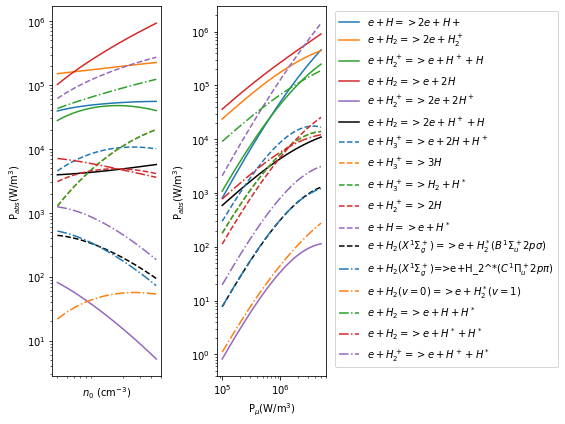

In [7]:
p0=1e6
nmin,nmax=4e13,4.5e14
n0=1e14
pmin,pmax=1e5,5e6
N=30
'''
___________________________________________________________________________
'''
fig,ax=plt.subplots(1,2,figsize=(8,6))
ns,names0,values0=gm.Absortion_n_sweep(p0,nmin,nmax,N,'log')
ps,names1,values1=gm.Absortion_p_sweep(n0,pmin,pmax,N,'log')
for i in range(len(names0)):
    color,marker=style(i)
    ax[1].plot(ps,values1[:,i],color=color,linestyle=marker,label=names0[i])
for i in range(len(names0)):
    color,marker=style(i)
    ax[0].plot(ns,values0[:,i],color=color,linestyle=marker,label=names0[i])
ax[1].set_xlabel('P$_\mu$(W/m$^3$)')
ax[1].set_ylabel('P$_{abs}$(W/m$^3$)')
ax[0].set_xlabel('$n_0$ (cm$^{-3}$)')
ax[0].set_ylabel('P$_{abs}$(W/m$^3$)')
ax[1].set_yscale('log')
ax[0].set_yscale('log')
ax[1].set_xscale('log')
ax[0].set_xscale('log')
ax[0].set_xticks([])
ax[1].legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.tight_layout()
plt.savefig('Figures/Power_absortion.pdf')

In [147]:
plt.plot(ps,values0[:,i],color='red',linestyle='--')

In [148]:
def style (i):
    color_list=['tab:blue','tab:orange','tab:green','tab:red','tab:purple']
    marker_list=['-','--','-.']
    i,j=np.divmod(i,len(color_list))
    return color_list[j],marker_list[i]

In [ ]:
np.divmod(4,6)

In [ ]:
gm.surface_reactions[3]